### 参考
https://www.jsme.or.jp/kaisi/1202-36/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import cv2
%matplotlib inline

In [2]:
#初期座標
x1=0
x2=3
y1=0
y2=3

#各種パラメータ
power=10 #外力
area=9 #断面積
stress=power/area #応力

young=1 #ヤング率
x_strain=stress/young #x方向のひずみ
delta_x=x_strain*x2 #元の長さからどれぐらい伸びたか
x3=delta_x+x2 #伸ばした時のx座標

poisson=0.49 #ポアソン比
y_strain=-poisson*x_strain #y方向のひずみ(定義式では負になるので、絶対値にしている)
y3=y2+y2*y_strain #伸ばした時のy座標


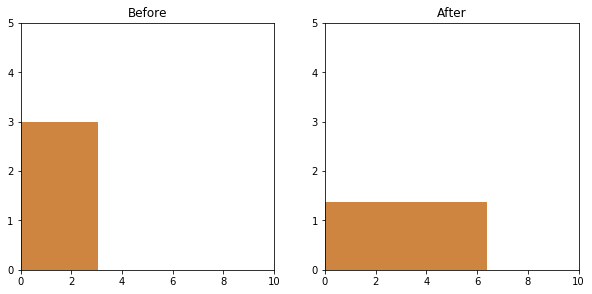

In [3]:
#描画(試しに最初と最後の画像を作成)
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(2,2,1)
plt.xlim(0,10)
plt.ylim(0,5) 
plt.title('Before')

ax2=fig.add_subplot(2,2,2)
plt.xlim(0,10)
plt.ylim(0,5) 
plt.title('After')

p1=pat.Polygon(xy=[(x1,y1),(x2,y1),(x2,y2),(x1,y2)],color='peru') #座標から四角形を描写する
p2=pat.Polygon(xy=[(x1,y1),(x3,y1),(x3,y3),(x1,y3)],color='peru')

ax1.add_patch(p1) #貼り付ける
ax2.add_patch(p2)



### オマケ　引っ張りの動画作成(要改善)

In [ ]:
#最初から最後(引っ張り後)までの画像を作成する
xx=np.arange(x2,x3, 0.01) #座標の範囲を決める
yy=np.arange(y2,y3, -0.003)
leng=len(xx)

for i in range(0,leng):
    fig4=plt.figure(figsize=(5,5))
    ax4=fig4.add_subplot(1,1,1)
    plt.xlim(0,10)
    plt.ylim(0,5)
    
    p3=pat.Polygon(xy=[(x1,y1),(xx[i],y1),(xx[i],yy[i]),(x1,yy[i])],color='peru') #動いている座標を指定する
    img=ax4.add_patch(p3) # グラフを作成
    plt.title("sample animation")
    
    filename=str(i)+'.jpeg'
    plt.savefig(filename)


In [ ]:
import cv2

frame_rate=20
fourcc=cv2.VideoWriter_fourcc('m','p','4,','v') #動画形式決定(ここではmp4ファイル)
video=cv2.VideoWriter('sample1.mp4',fourcc,frame_rate,(360,360)) #名前、フレーム数、大きさを指定(大きさは作成した画像そのまま)

i=1
while True:
    img=cv2.imread(str(i)+'.jpeg')
    if img is None:
        break
    video.write(img)
    i+=1

video.release()